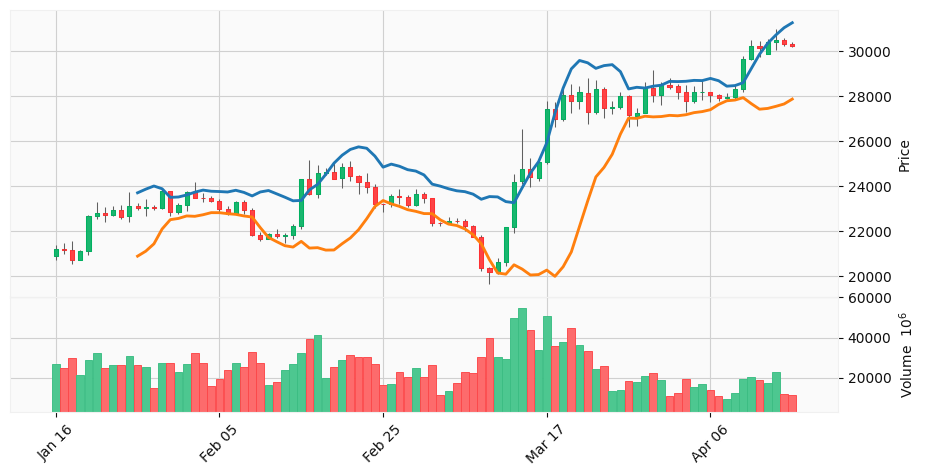

In [19]:
# First, calculate a simple moving average.
# Next, calculate the standard deviation over the same number of periods as the simple moving average. 
# For the upper band, add the standard deviation to the moving average. 
# For the lower band, subtract the standard deviation from the moving average.
# Typical values used:
# Short term: 10 day moving average, bands at 1.5 standard deviations. (1.5 times the standard dev. +/- the SMA)
# Medium term: 20 day moving average, bands at 2 standard deviations.
# Long term: 50 day moving average, bands at 2.5 standard deviations.

import pandas as pd
import numpy as np
import mplfinance as mpf
import math
import statistics

df = pd.read_csv("./BTC-USD.csv", index_col='Date', parse_dates=True)
df['SMA10'] = df['close'].rolling(10).mean()
def calc_stdev(prices):
    avg = sum(prices) / len(prices)
    observing_sum = 0
    
    for i in range(0, len(prices)):
        observing = (prices[i] - avg)**2
        observing_sum += observing
        
    stdev =  math.sqrt(observing_sum/(len(prices) - 1))
    return stdev
    
def set_bollinger_bands(df, sma_tag,period, multiply):
    prices = df['close'].to_list()
    dates = df.index.values
    for i in range(period, len(prices)):
        window = prices[i-period: i]
        stdev = calc_stdev(window)
        band = stdev * multiply
        # date = str(np.datetime_as_string(dates[i], unit='D'))
        sma = df.loc[dates[i], 'SMA10']
        upper_bb = sma + band
        lower_bb = sma - band
        # print(i,dates[i], band, sma,upper_bb,lower_bb   )
        df.at[dates[i], 'upper_bb'] = upper_bb
        df.at[dates[i], 'lower_bb'] = lower_bb

        

bb_period = 10
bb_multiply = 1.5

set_bollinger_bands(df, 'SMA10', bb_period, bb_multiply)

df_bb = df[['upper_bb','lower_bb']]
ap = mpf.make_addplot(df_bb)
mpf.plot(df, type='candle', style='yahoo', volume=True, figratio=(8,4), addplot=ap)

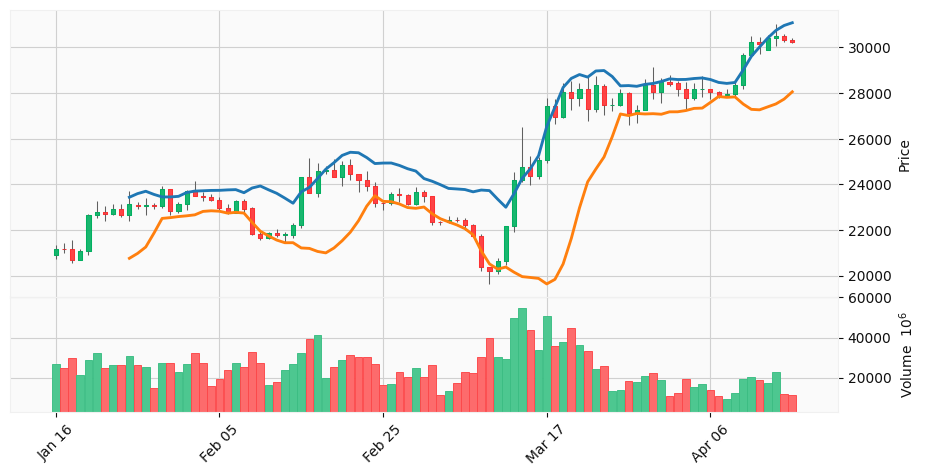

In [29]:
import pandas as pd
from ta.utils import dropna
from ta.volatility import BollingerBands

# Load datas
df = pd.read_csv("./BTC-USD.csv", index_col='Date', parse_dates=True)

# Initialize Bollinger Bands Indicator
indicator_bb = BollingerBands(close=df["close"], window=10, window_dev=1.5)

# Add Bollinger Bands features
df['bb_bbm'] = indicator_bb.bollinger_mavg()
df['bb_bbh'] = indicator_bb.bollinger_hband()
df['bb_bbl'] = indicator_bb.bollinger_lband()

# Add Bollinger Band high indicator
df['bb_bbhi'] = indicator_bb.bollinger_hband_indicator()

# Add Bollinger Band low indicator
df['bb_bbli'] = indicator_bb.bollinger_lband_indicator()

df_bb = df[['bb_bbh','bb_bbl']]
ap = mpf.make_addplot(df_bb)
mpf.plot(df, type='candle', style='yahoo', volume=True, figratio=(8,4), addplot=ap)